In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import holoviews as hv
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.stats as st
import numpy as np
import datetime as dt
import seaborn as sns



# Import data
path = "appointment.csv"

noshow_df = pd.read_csv(path)
noshow_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
# No duplicates
dup_patients = noshow_df[noshow_df.duplicated(['PatientId'])]
dup_patients

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.222383e+12,5566070,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.756579e+13,5582867,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
noshow_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
noshow_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [2]:
# Only want to inlcude rows that have values for the outcome we are trying to predict
noshow_df = noshow_df.dropna(subset=['Appointment_Outcome'])
noshow_df

,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome
0,75763,93.0,Male,Medicare,False,True,Student,Advanced Degree,True,37.785038,Suburban,11/4/2023,8/15/2024,Show
1,84945,52.0,Male,Uninsured,False,False,Employed,College,True,NaN,Rural,10/28/2023,7/11/2024,No-Show
2,88559,8.0,Male,Medicare,True,NaN,NaN,Advanced Degree,True,27.277654,Rural,2/12/2023,10/26/2024,Show
3,72217,5.0,Other,Medicare,False,True,Student,College,True,44.618708,NaN,1/30/2023,1/31/2024,Show
6,34403,15.0,Female,Medicaid,NaN,False,Unemployed,High School,True,34.033755,Suburban,8/13/2023,7/23/2024,Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,91361,57.0,Female,Private,True,False,Student,High School,True,28.410940,Suburban,1/26/2024,3/1/2024,Show
49995,16333,48.0,Female,NaN,True,True,Student,NaN,True,26.576418,Urban,11/24/2023,3/16/2024,No-Show
49996,11153,5.0,Other,Medicaid,True,True,Student,NaN,False,20.674054,Suburban,11/29/2023,12/5/2023,No-Show
49998,41988,53.0,Male,Medicaid,False,False,Employed,College,False,21.190068,Suburban,5/2/2023,12/19/2023,No-Show


In [3]:
noshow_df.dtypes

Patient_ID                  int64
Age                       float64
Gender                     object
Insurance_Type             object
Chronic_Disease            object
Mental_Health_Status       object
Employment_Status          object
Education_Level            object
Transportation_Access      object
Distance_from_Facility    float64
Area_Type                  object
Booking_Date               object
Appointment_Date           object
Appointment_Outcome        object
dtype: object

In [4]:
# No duplicates
dup_patients = noshow_df[noshow_df.duplicated(['Patient_ID'])]
dup_patients

,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome


In [5]:
# Convert 'Booking_Date' and 'Appointment_Date' columns to datetime if not already
noshow_df[['Booking_Date', 'Appointment_Date']] = noshow_df[['Booking_Date', 'Appointment_Date']].apply(pd.to_datetime, errors='coerce')

# Convert 'Age' to Int
#noshow_df['Age'] = noshow_df['Age'].astype(int)

# Calculate the difference in days, handling NaT values
diff = (noshow_df['Appointment_Date'] - noshow_df['Booking_Date']).dt.days

# Insert 'Days Diff' column at position 13
noshow_df.insert(12, 'Days Diff', diff)
noshow_df

C:\Users\lucas\AppData\Local\Temp\ipykernel_26284\4197393453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noshow_df[['Booking_Date', 'Appointment_Date']] = noshow_df[['Booking_Date', 'Appointment_Date']].apply(pd.to_datetime, errors='coerce')


,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Days Diff,Appointment_Date,Appointment_Outcome
0,75763,93.0,Male,Medicare,False,True,Student,Advanced Degree,True,37.785038,Suburban,2023-11-04,285,2024-08-15,Show
1,84945,52.0,Male,Uninsured,False,False,Employed,College,True,NaN,Rural,2023-10-28,257,2024-07-11,No-Show
2,88559,8.0,Male,Medicare,True,NaN,NaN,Advanced Degree,True,27.277654,Rural,2023-02-12,622,2024-10-26,Show
3,72217,5.0,Other,Medicare,False,True,Student,College,True,44.618708,NaN,2023-01-30,366,2024-01-31,Show
6,34403,15.0,Female,Medicaid,NaN,False,Unemployed,High School,True,34.033755,Suburban,2023-08-13,345,2024-07-23,Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,91361,57.0,Female,Private,True,False,Student,High School,True,28.410940,Suburban,2024-01-26,35,2024-03-01,Show
49995,16333,48.0,Female,NaN,True,True,Student,NaN,True,26.576418,Urban,2023-11-24,113,2024-03-16,No-Show
49996,11153,5.0,Other,Medicaid,True,True,Student,NaN,False,20.674054,Suburban,2023-11-29,6,2023-12-05,No-Show
49998,41988,53.0,Male,Medicaid,False,False,Employed,College,False,21.190068,Suburban,2023-05-02,231,2023-12-19,No-Show


In [6]:
noshow_df = noshow_df.drop(columns=['Patient_ID','Booking_Date','Appointment_Date'])

In [7]:
noshow_df

,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Days Diff,Appointment_Outcome
0,93.0,Male,Medicare,False,True,Student,Advanced Degree,True,37.785038,Suburban,285,Show
1,52.0,Male,Uninsured,False,False,Employed,College,True,NaN,Rural,257,No-Show
2,8.0,Male,Medicare,True,NaN,NaN,Advanced Degree,True,27.277654,Rural,622,Show
3,5.0,Other,Medicare,False,True,Student,College,True,44.618708,NaN,366,Show
6,15.0,Female,Medicaid,NaN,False,Unemployed,High School,True,34.033755,Suburban,345,Show
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,57.0,Female,Private,True,False,Student,High School,True,28.410940,Suburban,35,Show
49995,48.0,Female,NaN,True,True,Student,NaN,True,26.576418,Urban,113,No-Show
49996,5.0,Other,Medicaid,True,True,Student,NaN,False,20.674054,Suburban,6,No-Show
49998,53.0,Male,Medicaid,False,False,Employed,College,False,21.190068,Suburban,231,No-Show


In [8]:
noshow_df.nunique()

Age                         101
Gender                        3
Insurance_Type                4
Chronic_Disease               2
Mental_Health_Status          2
Employment_Status             4
Education_Level               3
Transportation_Access         2
Distance_from_Facility    40494
Area_Type                     3
Days Diff                   724
Appointment_Outcome           2
dtype: int64

In [9]:
noshow_df.dtypes

Age                       float64
Gender                     object
Insurance_Type             object
Chronic_Disease            object
Mental_Health_Status       object
Employment_Status          object
Education_Level            object
Transportation_Access      object
Distance_from_Facility    float64
Area_Type                  object
Days Diff                   int64
Appointment_Outcome        object
dtype: object

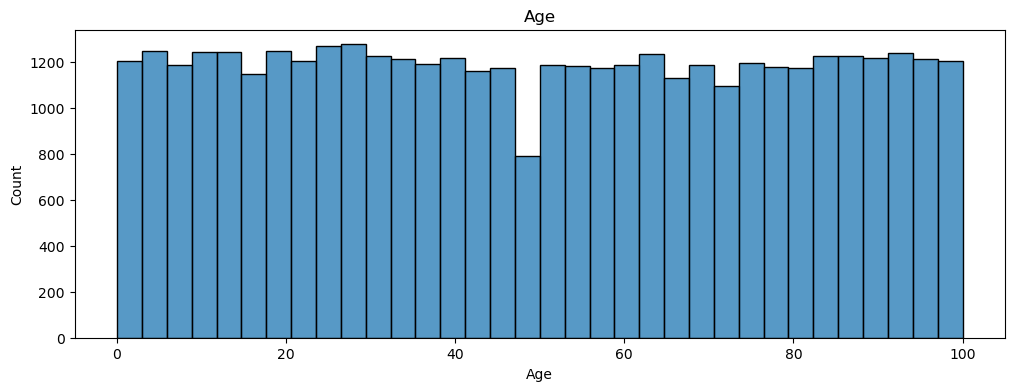

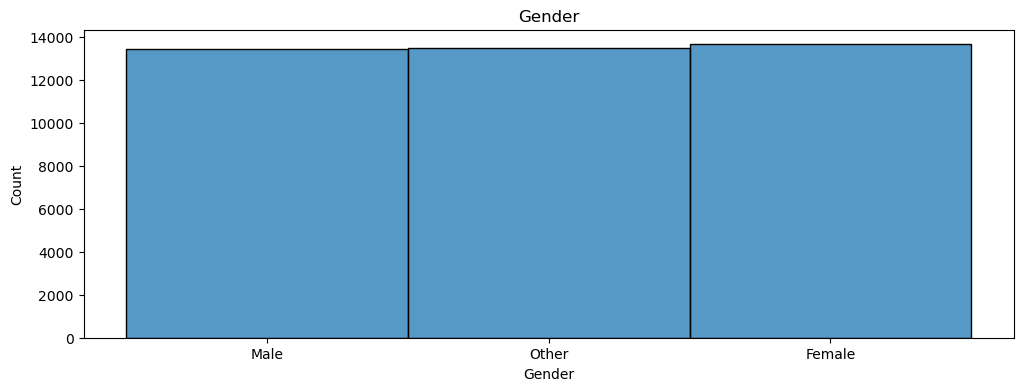

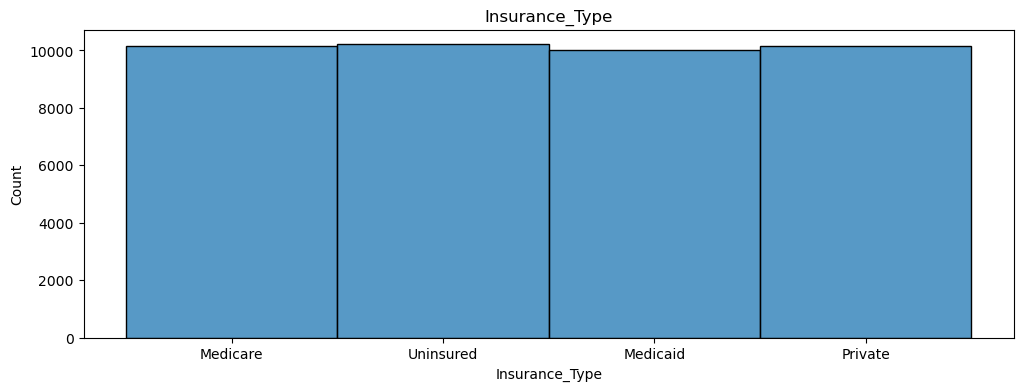

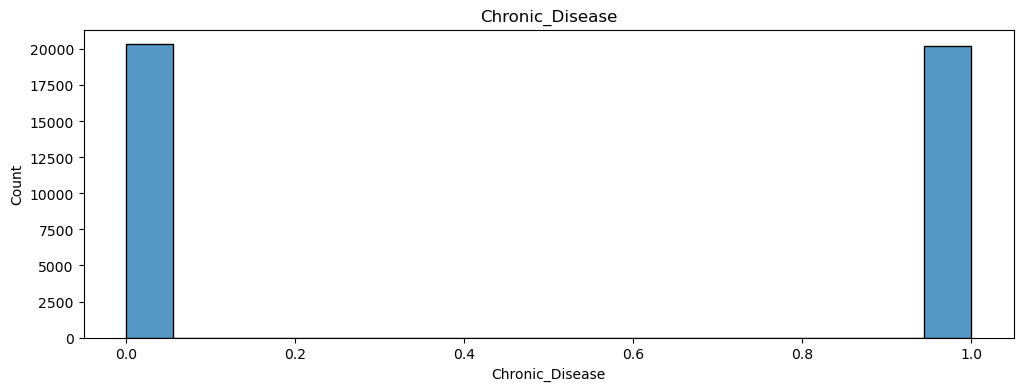

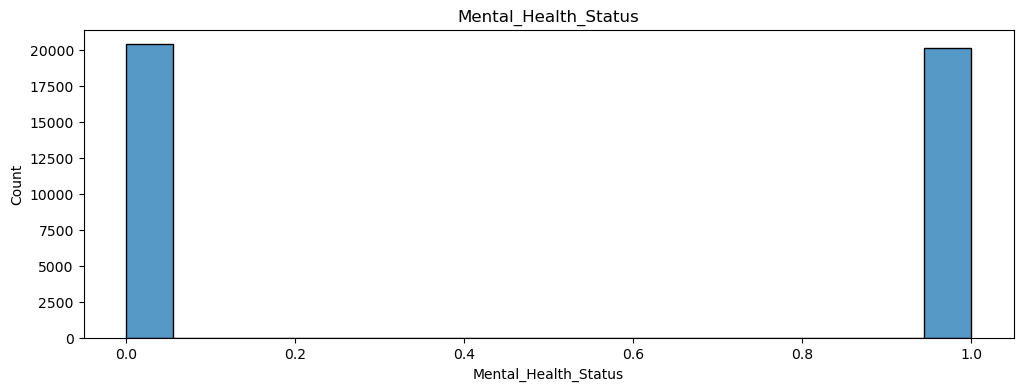

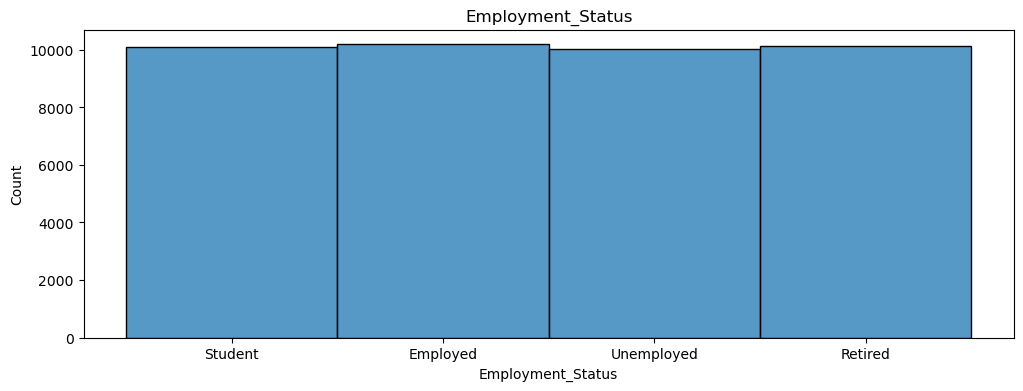

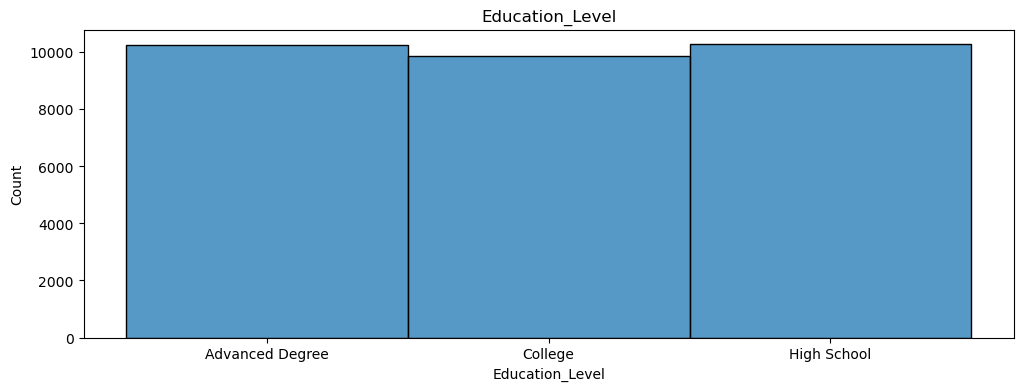

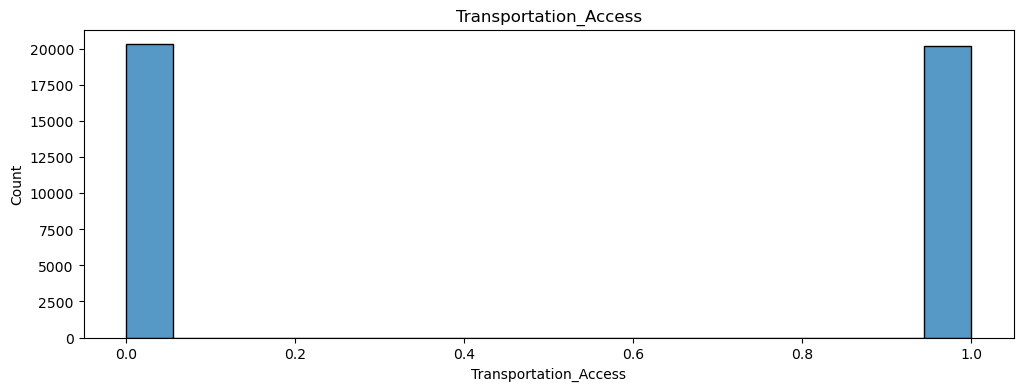

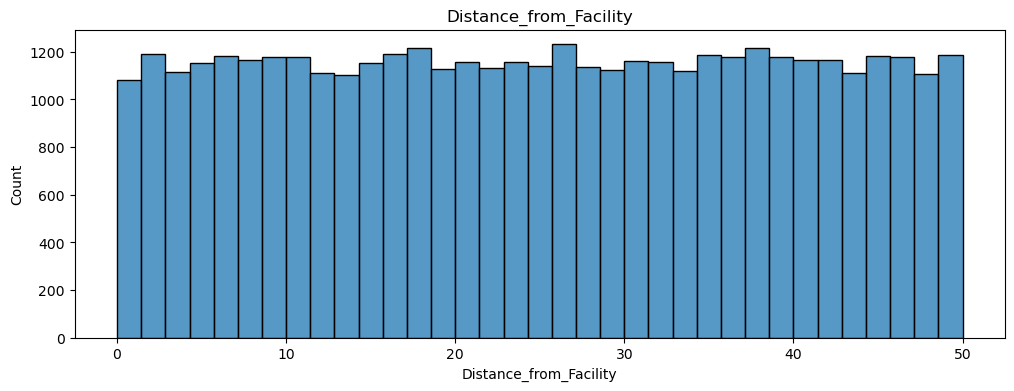

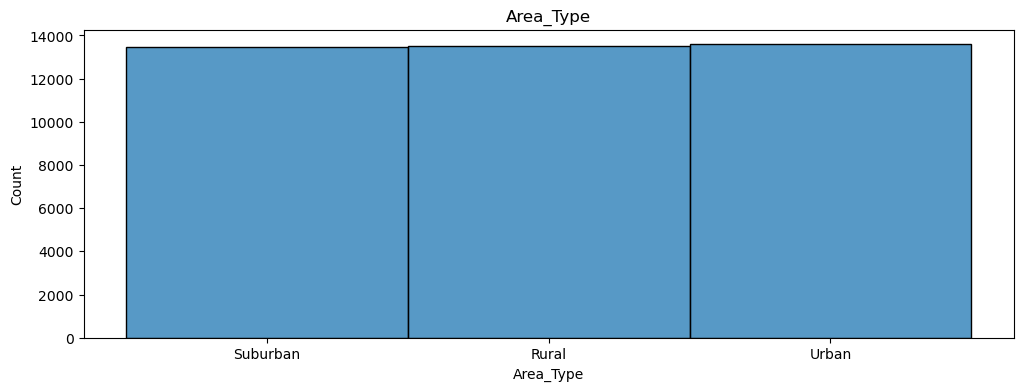

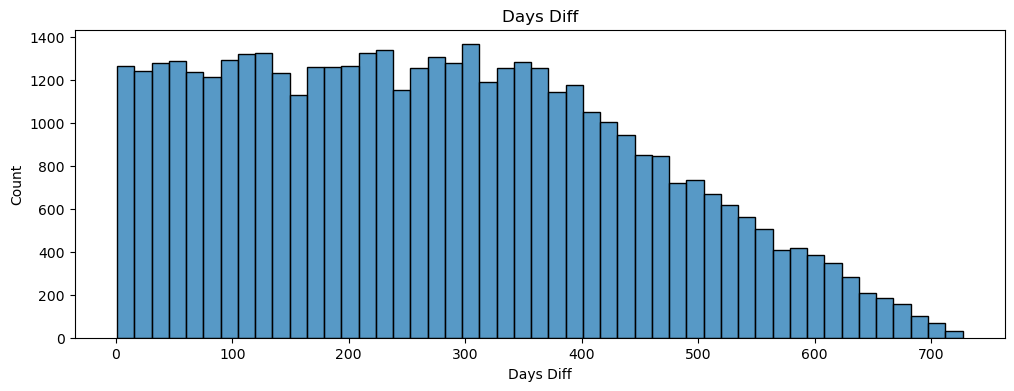

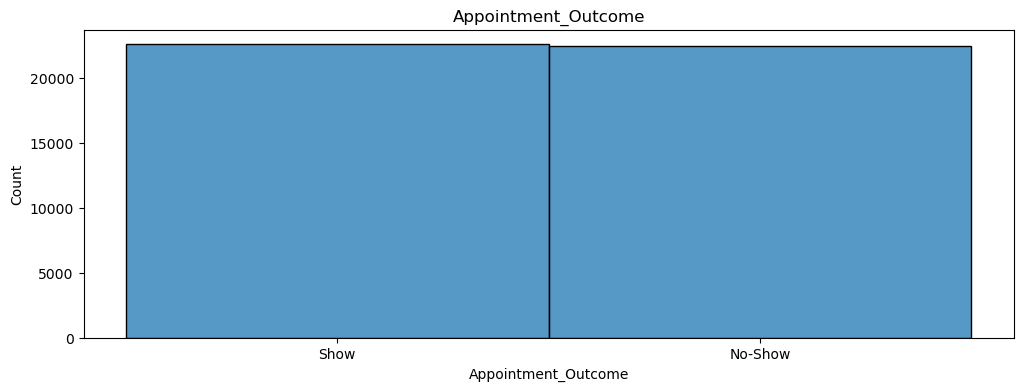

In [10]:
# Really evenly distributed data. Exception: About a 30% drop for patients around age 50. 
for column in noshow_df:
    plt.figure(figsize=(12,4))
    sns.histplot(data=noshow_df[column])
    plt.title(f'{column}')
    plt.show()

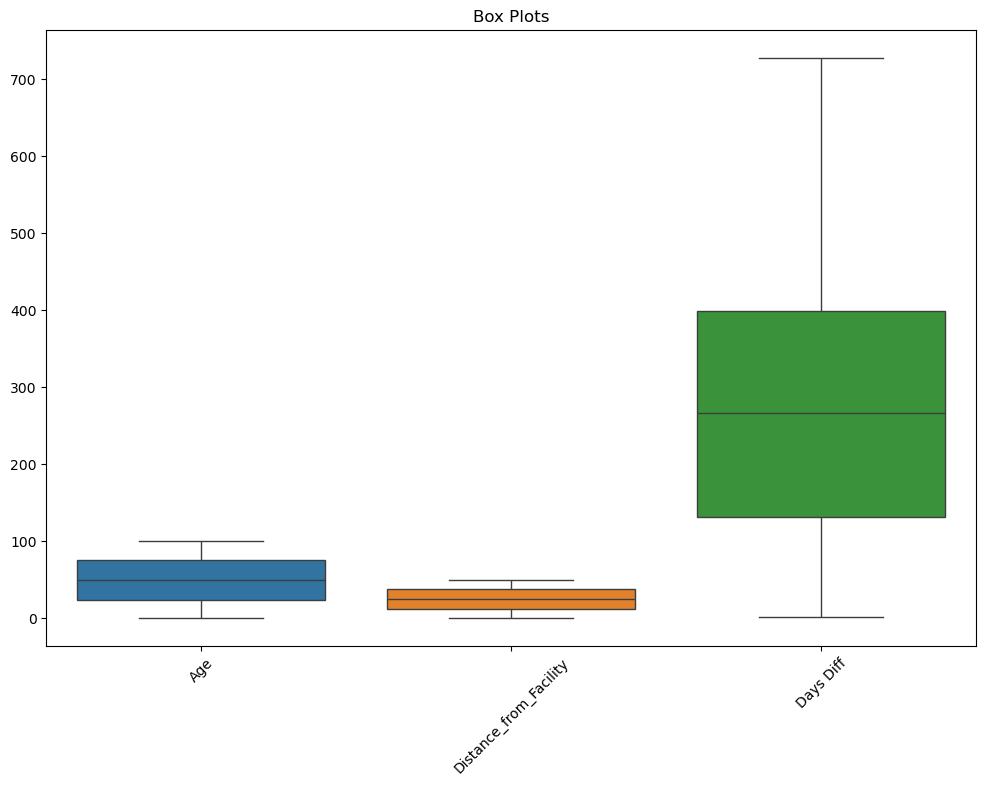

In [11]:
selected_columns = ['Age', 'Insurance_Type', 'Employment_Status', 'Distance_from_Facility', 'Days Diff']

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=noshow_df[selected_columns])
plt.title('Box Plots')
plt.xticks(rotation=45)
plt.show()

In [12]:
noshow_df.dropna()

,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Days Diff,Appointment_Outcome
0,93.0,Male,Medicare,False,True,Student,Advanced Degree,True,37.785038,Suburban,285,Show
10,76.0,Female,Medicare,True,True,Student,Advanced Degree,False,21.246094,Suburban,422,Show
11,18.0,Male,Private,False,False,Unemployed,Advanced Degree,True,35.827139,Urban,578,Show
13,6.0,Male,Private,True,False,Retired,Advanced Degree,True,43.314191,Suburban,281,No-Show
20,100.0,Male,Medicaid,False,True,Retired,College,True,30.057164,Urban,184,Show
...,...,...,...,...,...,...,...,...,...,...,...,...
49989,50.0,Male,Medicare,True,True,Retired,Advanced Degree,False,2.219225,Urban,613,No-Show
49990,75.0,Female,Medicare,False,True,Employed,Advanced Degree,False,11.718303,Urban,84,Show
49991,8.0,Female,Medicare,True,False,Student,Advanced Degree,False,16.827135,Suburban,575,No-Show
49993,57.0,Female,Private,True,False,Student,High School,True,28.410940,Suburban,35,Show


In [13]:
noshow_df.dtypes

Age                       float64
Gender                     object
Insurance_Type             object
Chronic_Disease            object
Mental_Health_Status       object
Employment_Status          object
Education_Level            object
Transportation_Access      object
Distance_from_Facility    float64
Area_Type                  object
Days Diff                   int64
Appointment_Outcome        object
dtype: object

In [14]:
noshow_pca_df = noshow_df[['Age','Distance_from_Facility','Days Diff']]

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
noshow_df_imputed = imputer.fit_transform(noshow_pca_df)

# Apply PCA to the imputed data
pca = PCA(n_components=2)
noshow_pca = pca.fit_transform(noshow_df_imputed)

In [16]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.9678538 , 0.02587398])

In [17]:
# Create the PCA DataFrame
noshow_pca_df = pd.DataFrame(
    noshow_pca,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
noshow_pca_df.head()

,PCA1,PCA2
0,9.406114,43.137437
1,-18.573776,2.197995
2,346.448976,-41.626305
3,90.451891,-44.859240
4,69.445934,-34.808445


In [18]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [19]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(noshow_pca_df)
    inertia.append(k_model.inertia_)

c:\Users\lucas\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lucas\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lucas\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\lucas\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lucas\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lucas\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lucas\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [20]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,1.332599e+09
1,2,4.141320e+08
2,3,2.116169e+08
3,4,1.357107e+08
4,5,1.008031e+08


In [21]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)


:Curve   [k]   (inertia)

In [24]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(noshow_pca_df)

# Make predictions
k_3 = model.predict(noshow_pca_df)

# Create a copy of the customers_pca_df DataFrame
noshow_pca_predictions_df = noshow_pca_df.copy()

# Add a class column with the labels
noshow_pca_predictions_df["customer_segments"] = k_3

c:\Users\lucas\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
# Plot the clusters
noshow_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="customer_segments"
)

:NdOverlay   [customer_segments]
   :Scatter   [PCA1]   (PCA2)

In [ ]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(noshow_pca_df)

# Make predictions
k_3 = model.predict(noshow_pca_df)

# Create a copy of the customers_pca_df DataFrame
noshow_pca_predictions_df = noshow_pca_df.copy()

# Add a class column with the labels
noshow_pca_predictions_df["customer_segments"] = k_3

In [23]:
noshow_df.to_csv('clean_df.csv', index=False)